In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.io import fits
from astropy.utils import data
from spectral_cube import SpectralCube
from astropy.wcs import WCS
from reproject import reproject_interp

In [32]:
data = fits.open('/home/patito/Documents/datoselectivo/cubo/jellifysh.fits')
cubo = SpectralCube.read(data[1])
data.close()

In [37]:
#latitud y longitud de la imagen, se ponen las unidades en astropy
lat_range = [21.141321,21.159599] * u.deg 
lon_range = [354.092428,354.111908] * u.deg
#se genera el cubo con la informacion de ra dec
cubo = cubo.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1], zlo=5000*u.AA, zhi=5320*u.AA)

In [38]:
moment_0_stellarcontinuum = cubo.with_spectral_unit(u.AA).moment(order=0)  # Zero-th moment 
moment_1_hbeta = cubo.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=5162*u.AA).moment(order=1)  # First moment

# Write the moments as a FITS image
moment_0_stellarcontinuum.write('ha_moment_0.fits', overwrite=True) 
moment_1_hbeta.write('ha_moment_1.fits', overwrite=True)

print('Moment_0 has units of: ', moment_0_stellarcontinuum.unit)
print('Moment_1 has units of: ', moment_1_hbeta.unit)

stellardensity = moment_0_stellarcontinuum * 10**18 / (u.cm * u.cm) * u.s / u.K / u.km

Moment_0 has units of:  1e-20 erg / (s cm2)
Moment_1 has units of:  km / s


/home/patito/.local/lib/python3.10/site-packages/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /


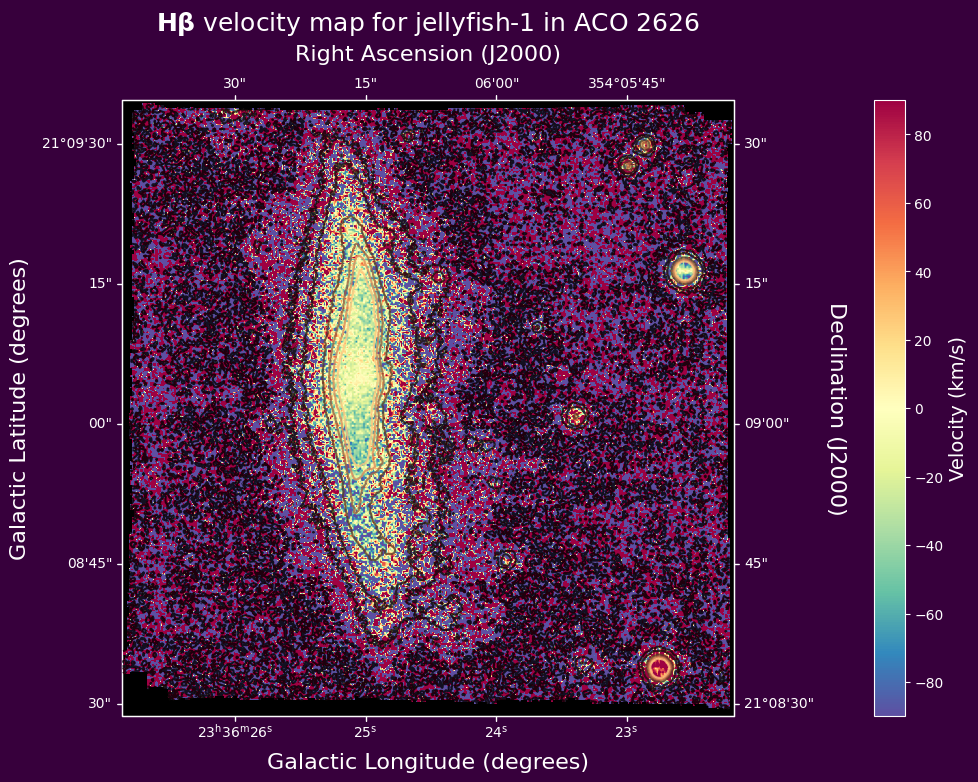

In [54]:
%matplotlib inline
# Initiate a figure and axis object with WCS projection information
fig = plt.figure(figsize=(12, 8),facecolor='#37003C')
plt.style.use('dark_background')
ax = fig.add_subplot(111, projection=moment_1_hbeta.wcs)

# Display the moment map image
im = ax.imshow(moment_1_hbeta.hdu.data, cmap='Spectral_r', vmin=-90, vmax=90)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
ax.set_xlabel("Galactic Longitude (degrees)", fontsize=16)
ax.set_ylabel("Galactic Latitude (degrees)", fontsize=16)


# Add a colorbar
cbar = plt.colorbar(im, pad=.15)
cbar.set_label('Velocity (km/s)', size=14)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted', lw=2)
overlay[0].set_axislabel('Right Ascension (J2000)', fontsize=16)
overlay[1].set_axislabel('Declination (J2000)', fontsize=16)

# Overplot column density contours   # Define contour levels to use
levels = (1e20, 5e20, 1e21, 3e21, 5e21, 7e21, 1e22)  # Define contour levels to use
ax.contour(stellardensity.hdu.data, cmap='copper', alpha=0.8, levels=levels)

plt.title(r'$\mathbf{H\beta}$ velocity map for jellyfish-1 in ACO 2626', fontsize=18, color='white', y=1.1)
plt.show()

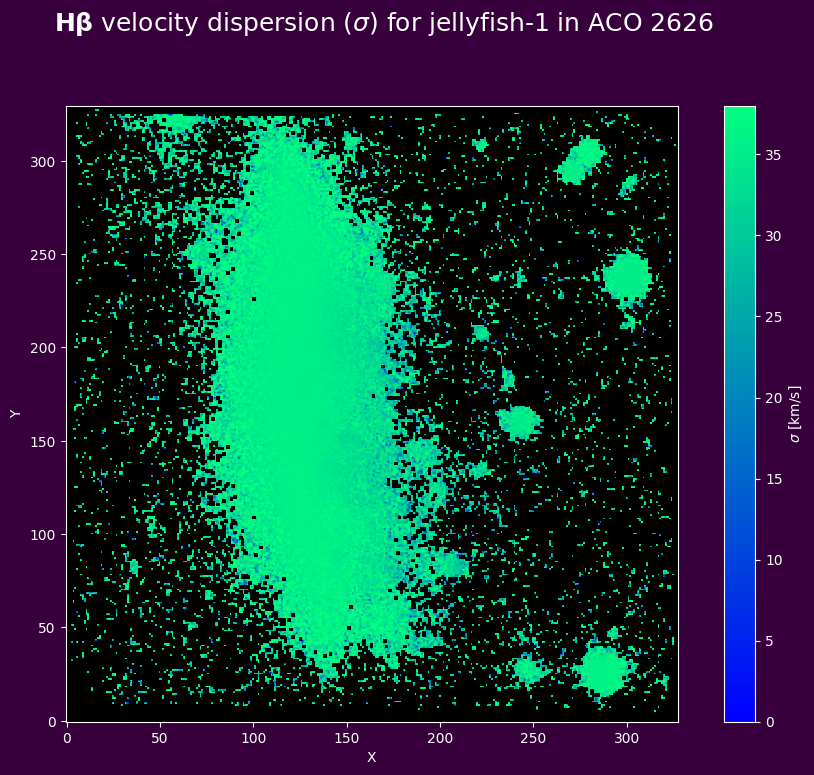

In [64]:
sigma_map = cubo.linewidth_sigma()

fwhm_map = cubo.linewidth_fwhm()

# Visualiza los mapas
fig = plt.figure(figsize=(12, 8),facecolor='#37003C')
plt.imshow(sigma_map.value, cmap='winter', vmin=0, vmax=38,origin='lower')
plt.colorbar(label=r'$\sigma$ [km/s]')
plt.xlabel('X')
plt.ylabel('Y')
plt.suptitle(r'$\mathbf{H\beta}$ velocity dispersion ($\sigma$) for jellyfish-1 in ACO 2626', fontsize=18, color='white', y=1)

#plt.tight_layout()
plt.show()